In [81]:
import requests
import pandas as pd
url = "https://rate.bot.com.tw/xrt/quote/l6m/USD"
res = requests.get(url)
table = pd.read_html(res.text)
df = table[0]
df.head(10)

掛牌日期                幣別    現金匯率 Unnamed: 4_level_0               即期匯率  \
         本行買入      本行賣出    本行買入    本行賣出 Unnamed: 4_level_1 Unnamed: 5_level_1   
0  2019/11/21  美金 (USD)  30.115  30.785             30.465             30.565   
1  2019/11/20  美金 (USD)  30.080  30.750             30.430             30.530   
2  2019/11/19  美金 (USD)  30.100  30.770             30.450             30.550   
3  2019/11/18  美金 (USD)  30.090  30.760             30.440             30.540   
4  2019/11/15  美金 (USD)  30.115  30.785             30.465             30.565   
5  2019/11/14  美金 (USD)  30.160  30.830             30.510             30.610   
6  2019/11/13  美金 (USD)  30.100  30.770             30.450             30.550   
7  2019/11/12  美金 (USD)  30.015  30.685             30.365             30.465   
8  2019/11/11  美金 (USD)  30.015  30.685             30.365             30.465   
9  2019/11/08  美金 (USD)  29.995  30.665             30.345             30.445   

  Unnamed: 6_level_0  
  Unnamed: 6_level_1  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
6                NaN  
7                NaN  
8                NaN  
9                NaN

In [82]:
df.columns = df.columns.droplevel()
df = df.drop('Unnamed: 6_level_1', axis=1)
df.columns = ['Date', 'CUR', 'CASH_BUY','CASH_SELL','RATE_BUY','RATE_SELL']
df.head(10)

,Date,CUR,CASH_BUY,CASH_SELL,RATE_BUY,RATE_SELL
0,2019/11/21,美金 (USD),30.115,30.785,30.465,30.565
1,2019/11/20,美金 (USD),30.080,30.750,30.430,30.530
2,2019/11/19,美金 (USD),30.100,30.770,30.450,30.550
3,2019/11/18,美金 (USD),30.090,30.760,30.440,30.540
4,2019/11/15,美金 (USD),30.115,30.785,30.465,30.565
5,2019/11/14,美金 (USD),30.160,30.830,30.510,30.610
6,2019/11/13,美金 (USD),30.100,30.770,30.450,30.550
7,2019/11/12,美金 (USD),30.015,30.685,30.365,30.465
8,2019/11/11,美金 (USD),30.015,30.685,30.365,30.465
9,2019/11/08,美金 (USD),29.995,30.665,30.345,30.445


In [83]:
df['CUR']='USD'
df = df.sort_index(ascending=False) 
df.head(10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,CUR,CASH_BUY,CASH_SELL,RATE_BUY,RATE_SELL
128,2019/05/22,USD,31.115,31.805,31.485,31.585
127,2019/05/23,USD,31.115,31.805,31.485,31.585
126,2019/05/24,USD,31.085,31.775,31.455,31.555
125,2019/05/27,USD,31.025,31.715,31.395,31.495
124,2019/05/28,USD,31.050,31.740,31.420,31.520
123,2019/05/29,USD,31.155,31.845,31.525,31.625
122,2019/05/30,USD,31.180,31.870,31.550,31.650
121,2019/05/31,USD,31.180,31.870,31.550,31.650
120,2019/06/03,USD,31.075,31.765,31.445,31.545
119,2019/06/04,USD,31.040,31.730,31.410,31.510


In [84]:
idx = df.index
idx = -(idx - df.shape[0] + 1)
df.index = idx
df.head(10)

,Date,CUR,CASH_BUY,CASH_SELL,RATE_BUY,RATE_SELL
0,2019/05/22,USD,31.115,31.805,31.485,31.585
1,2019/05/23,USD,31.115,31.805,31.485,31.585
2,2019/05/24,USD,31.085,31.775,31.455,31.555
3,2019/05/27,USD,31.025,31.715,31.395,31.495
4,2019/05/28,USD,31.050,31.740,31.420,31.520
5,2019/05/29,USD,31.155,31.845,31.525,31.625
6,2019/05/30,USD,31.180,31.870,31.550,31.650
7,2019/05/31,USD,31.180,31.870,31.550,31.650
8,2019/06/03,USD,31.075,31.765,31.445,31.545
9,2019/06/04,USD,31.040,31.730,31.410,31.510


In [85]:
ds = pd.DataFrame(df[['Date','RATE_BUY']])
ds.head(10)

,Date,RATE_BUY
0,2019/05/22,31.485
1,2019/05/23,31.485
2,2019/05/24,31.455
3,2019/05/27,31.395
4,2019/05/28,31.420
5,2019/05/29,31.525
6,2019/05/30,31.550
7,2019/05/31,31.550
8,2019/06/03,31.445
9,2019/06/04,31.410


In [86]:
ds['RATE_BUY'] = pd.to_numeric(ds['RATE_BUY'])

In [87]:
Open = [ds['RATE_BUY'][0]]
Open.extend(ds['RATE_BUY'][0:-1])

In [88]:
Close = list(ds['RATE_BUY'][:])

In [89]:
High = [max(o, c) for o, c in zip(Open, Close)]

In [90]:
Low = [min(o, c) for o, c in zip(Open, Close)]

In [91]:
print(len(Open), len(Close), len(Max), len(Min))

129 129 129 129


In [92]:
ds['Open'] = Open
ds['High'] = High
ds['Low'] = Low
ds['Close'] = Close
ds = ds.drop('RATE_BUY', axis=1)
ds.head(10)

,Date,Open,High,Low,Close
0,2019/05/22,31.485,31.485,31.485,31.485
1,2019/05/23,31.485,31.485,31.485,31.485
2,2019/05/24,31.485,31.485,31.455,31.455
3,2019/05/27,31.455,31.455,31.395,31.395
4,2019/05/28,31.395,31.420,31.395,31.420
5,2019/05/29,31.420,31.525,31.420,31.525
6,2019/05/30,31.525,31.550,31.525,31.550
7,2019/05/31,31.550,31.550,31.550,31.550
8,2019/06/03,31.550,31.550,31.445,31.445
9,2019/06/04,31.445,31.445,31.410,31.410


In [93]:
ds['Date'] = pd.to_datetime(ds['Date'])
ds.index = ds['Date']
ds.head(10)

,Date,Open,High,Low,Close
Date,,,,,
2019-05-22,2019-05-22,31.485,31.485,31.485,31.485
2019-05-23,2019-05-23,31.485,31.485,31.485,31.485
2019-05-24,2019-05-24,31.485,31.485,31.455,31.455
2019-05-27,2019-05-27,31.455,31.455,31.395,31.395
2019-05-28,2019-05-28,31.395,31.420,31.395,31.420
2019-05-29,2019-05-29,31.420,31.525,31.420,31.525
2019-05-30,2019-05-30,31.525,31.550,31.525,31.550
2019-05-31,2019-05-31,31.550,31.550,31.550,31.550
2019-06-03,2019-06-03,31.550,31.550,31.445,31.445


In [94]:
ds['ma5'] = ds['Close'].rolling(window = 5).mean()
ds['ma10'] = ds['Close'].rolling(window = 10).mean()

In [95]:
ds.head(10)

,Date,Open,High,Low,Close,ma5,ma10
Date,,,,,,,
2019-05-22,2019-05-22,31.485,31.485,31.485,31.485,NaN,NaN
2019-05-23,2019-05-23,31.485,31.485,31.485,31.485,NaN,NaN
2019-05-24,2019-05-24,31.485,31.485,31.455,31.455,NaN,NaN
2019-05-27,2019-05-27,31.455,31.455,31.395,31.395,NaN,NaN
2019-05-28,2019-05-28,31.395,31.420,31.395,31.420,31.448,NaN
2019-05-29,2019-05-29,31.420,31.525,31.420,31.525,31.456,NaN
2019-05-30,2019-05-30,31.525,31.550,31.525,31.550,31.469,NaN
2019-05-31,2019-05-31,31.550,31.550,31.550,31.550,31.488,NaN
2019-06-03,2019-06-03,31.550,31.550,31.445,31.445,31.498,NaN


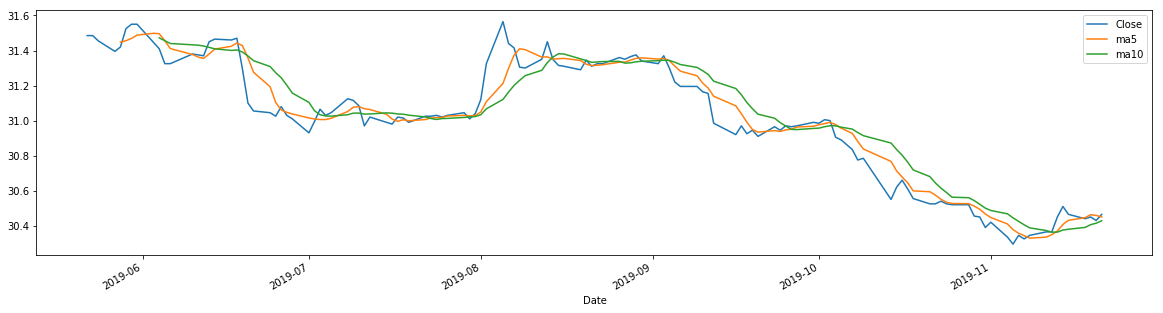

In [96]:
ds[['Close','ma5','ma10']].plot(kind = 'line', figsize=[20, 5])

In [97]:
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline

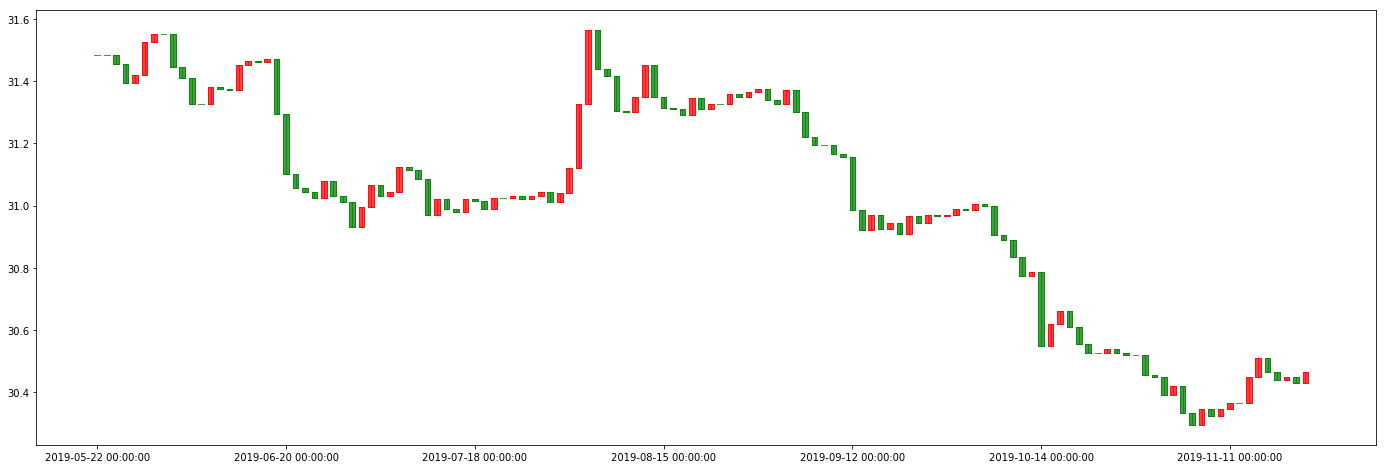

In [98]:
fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(ds.index), 20))
ax.set_xticklabels(ds.index[::20])
mpf.candlestick2_ochl(ax, ds['Open'], ds['Close'], ds['High'], 
                      ds['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75);